# Integración Estadística con Python

* Medidas de centralización
* Medidas de dispersión
* Medidas de posición
* Medidas de forma
* Medidas de correlación

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats #algoritmos matemáticos

In [33]:
#Cargar nuevo dataset
df = pd.read_csv('Data/datos_ventas_mes.csv', index_col=0)
#Visualizar los primeros registros
df.head()

,Producto,Precio,Cantidad,Region,id_vendedor
Fecha,,,,,
2024-10-07,Medicamentos y recetas,10.000000,13,Murcia,o31
2024-10-20,Cobertura de enfermedades y cirugías,10.000000,9,Madrid,a99
2024-10-29,Cobertura de enfermedades y cirugías,29.025157,15,Cataluña,o31
2024-10-15,Cobertura médica básica,142.930869,13,Cataluña,o31
2024-10-11,Medicamentos y recetas,10.000000,1,Andalucía,p12


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2024-10-07 to 2024-10-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Producto     31 non-null     object 
 1   Precio       31 non-null     float64
 2   Cantidad     31 non-null     int64  
 3   Region       31 non-null     object 
 4   id_vendedor  31 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ KB


---
- ### Medidas de posición (Cuartiles)

<Axes: ylabel='Precio'>

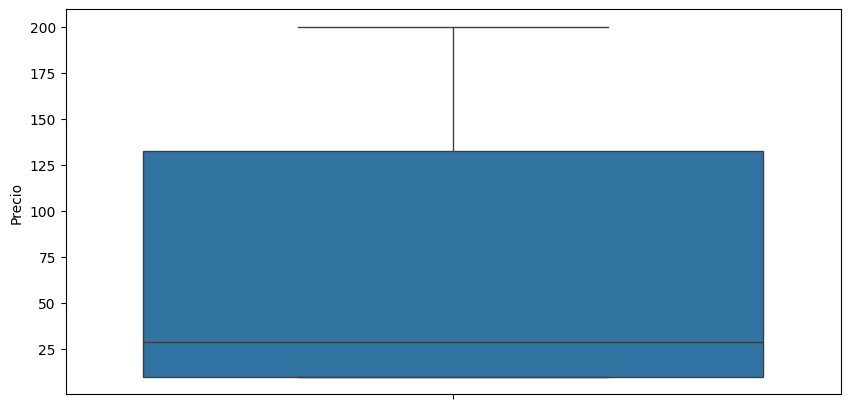

In [35]:
plt.figure(figsize=(10, 5)) #Define el tamaño de la figura
sns.boxplot(data=df ["Precio"])

In [30]:
#Cuantiles
q1 = np.percentile(df["Precio"], 25)
q2 = np.percentile(df["Precio"], 50)
q3 = np.percentile(df["Precio"], 75)
bigote_inferiror = q1 - 1.5 * (q3 - q1)
bigote_superior = q3 + 1.5 * (q3 - q1)

In [36]:
bigote_superior

315.91370924602995

---
- ### Medidas de centralización (media, mediana, moda)

In [4]:
df["Region"].value_counts()
#Value_counts() nos permite ver la cantidad de veces que se repite cada valor en la columna "Region", mejor que la moda, ya que nos da una idea de la distribución de los datos.


Region
Cataluña     14
Andalucía     7
Madrid        6
Murcia        4
Name: count, dtype: int64

---
- ### Medidas de dispersión (Varianza, Desv. Std, Rango)
Muestra cuan dispersa están al rededor de las medidas de centralización. 


In [5]:
df["Cantidad"].std() #Desviación estándar de la columna "Cantidad"

5.019745955958886

In [6]:
#No puede cancular la Dv STD de todo pero si de las numericas

df_numeric = df.select_dtypes(include=[np.number]) #Selecciona solo las columnas numéricas
df_numeric.std() #Calcula la desviación estándar de las columnas numéricas

Precio      74.058402
Cantidad     5.019746
dtype: float64

In [8]:
df_numeric.describe().T #Muestra un resumen estadístico de las columnas numéricas

,count,mean,std,min,25%,50%,75%,max
Precio,31.0,69.798095,74.058402,10.0,10.0,29.025157,132.365484,200.0
Cantidad,31.0,8.258065,5.019746,1.0,4.0,8.000000,12.000000,19.0


In [12]:
df_numeric.var() #Calcula la varianza de las columnas numéricas

Precio      5484.646876
Cantidad      25.197849
dtype: float64

In [10]:
df_cat = df.select_dtypes(include="O") #Selecciona solo las columnas categóricas
df_cat.describe().T #Muestra un resumen estadístico de las columnas categóricas

,count,unique,top,freq
Producto,31,4,Consultas médicas con especialistas,10
Region,31,4,Cataluña,14
id_vendedor,31,5,a99,10


---
- ### Medidas de forma [Custosis, Asimetría (negativa (izq) o positiva (der))]

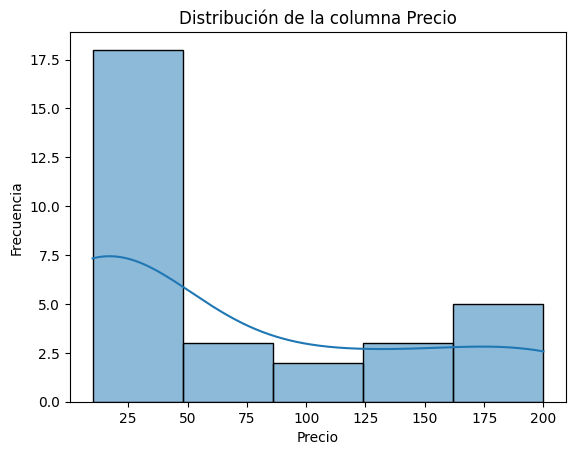

In [16]:
#Plot histograma de precios
sns.histplot(data=df, 
             x=df["Precio"], 
             bins=5,
             kde=True)
plt.title("Distribución de la columna Precio")
plt.xlabel("Precio")
plt.ylabel("Frecuencia");

In [ ]:
asimetria_precio = stats.skew(df["Precio"]) #Calcula la asimetría de la columna Precio
asimetria_precio
#Si el valor es positivo, la distribución está sesgada a la derecha (asimetría positiva). Datos a la izq y cola larga a la derecha.
# #Si el valor es negativo, la distribución está sesgada a la izquierda (asimetría negativa). Datos a la derecha y cola larga a la izquierda.

0.7834569821413733

In [20]:
#Curtosis, 
#cercana a cero indica que la distribución es similar a una normal, valores positivos indican colas más pesadas y valores negativos indican colas más ligeras.
#La curtosis mide la "altura" de la distribución, mientras que la asimetría mide la "simetría" de la distribución.
#La curtosis es una medida de la forma de la distribución, que indica la presencia de colas pesadas o ligeras en comparación con una distribución normal.

curtosis_precio = stats.kurtosis(df["Precio"]) #Calcula la curtosis de la columna Precio
curtosis_precio

-0.9875296788179759

In [19]:
curtosis_precio = df["Precio"].kurt() #Otra forma de calcular la curtosis
curtosis_precio

-0.9458478961394787

---
- ### Medidas de correlación (positiva, negativa y ausencia de correlación)

In [24]:
#Matriz, calcula la matriz de correlación de las columnas numéricas, cuanto más cerca de 1 o -1, más fuerte es la relación entre las variables.
matriz_corr = df.corr(numeric_only=True,
                      method='pearson') #Calcula la matriz de correlación de Pearson
matriz_corr

,Precio,Cantidad
Precio,1.000000,-0.000738
Cantidad,-0.000738,1.000000


<Axes: >

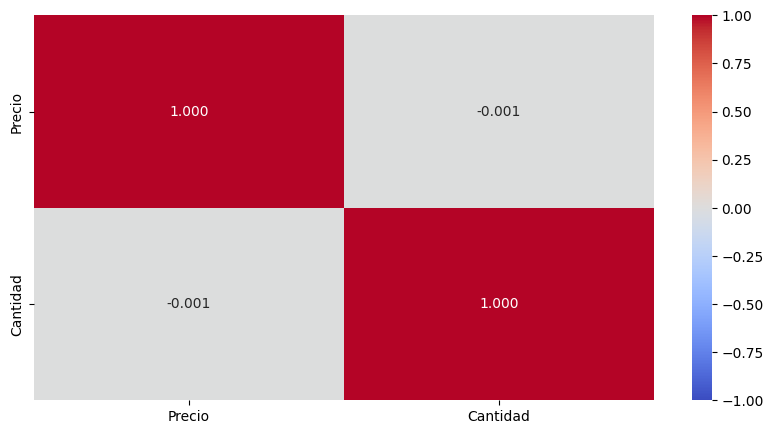

In [27]:
plt.figure(figsize=(10, 5)) #Define el tamaño de la figura
sns.heatmap(matriz_corr,
            vmax=1,
            vmin=-1,
            annot=True, #Muestra los valores en el mapa de calor
            cmap='coolwarm', #Define el mapa de colores
            fmt='.3f')